### Reference Answer

In [21]:
### Begin Assignment Here

import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/meiiansam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

### Part1: take home exercises

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [25]:
### Exercise2:

print("use .query() to get the data satisfy the condition ")
print(X.query('category == 1'))

print("Sort in reverse order:")
print(X[::-1])

use .query() to get the data satisfy the condition 
                                                   text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
11    From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
14    From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15    From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
...                                                 ...       ...   
2232  From: lipman@oasys.dt.navy.mil (Robert Lipman)...         1   
2236  From: dkusswur@falcon.depaul.edu (Daniel C. Ku...         1   
2241  From: dls@aeg.dsto.gov.au (David Silver) Subje...         1   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   

      category_name  
0     comp.graphics  
1     comp.graphics  
11    comp.graphics  
14    comp.graphics  
15    com

In [26]:
### Exercise5:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
display(NA_df)

print(NA_df['missing_example'].isnull())

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool


In [27]:
# Exercise5 Answer here:
for element in NA_df["missing_example"]:
    print(type(element))
    
print('\n')
print("Ans:")
print("Because there are three type of object representing NULL value in pandas： np.nan (not a number), None, pd.NaT (not a time)")
print("And `np.nan` is a np.float64 object, `None` is a python Nonetype object")
print("but 'None', '', 'NaN' these three are string type. Therefore, is.null() cannot detect them.")

<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>


Ans:
Because there are three type of object representing NULL value in pandas： np.nan (not a number), None, pd.NaT (not a time)
And `np.nan` is a np.float64 object, `None` is a python Nonetype object
but 'None', '', 'NaN' these three are string type. Therefore, is.null() cannot detect them.


In [28]:
X.dropna(inplace=True)
X.drop_duplicates(keep=False, inplace=True)

In [29]:
X_sample = X.sample(n=1000,random_state=42) #random state

In [30]:
### Exercise6:
display(X)
display(X_sample)

for i in range(4):
    print("categroy", i)
    print("category prob. in X = ", len(X[X['category'] == i])/len(X))
    print("category prob. in X_sample = ",len(X_sample[X_sample['category'] == i])/len(X_sample))
    print("-----")
    
print("1. X contains 2257 data, X_sample contains 1000 data only.")
print("2. The order of X_sample is different from X, that is X_sample is not cut a continous piece of X with 1000 data.")
print("3. The probability distribution of X and X_sample similar because of the random sampling, but they are slightly different because X_sample is only the subset of X.")

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


categroy 0
category prob. in X =  0.21267168808152415
category prob. in X_sample =  0.206
-----
categroy 1
category prob. in X =  0.25875055383252105
category prob. in X_sample =  0.247
-----
categroy 2
category prob. in X =  0.2631812140008861
category prob. in X_sample =  0.277
-----
categroy 3
category prob. in X =  0.2653965440850687
category prob. in X_sample =  0.27
-----
1. X contains 2257 data, X_sample contains 1000 data only.
2. The order of X_sample is different from X, that is X_sample is not cut a continous piece of X with 1000 data.
3. The probability distribution of X and X_sample similar because of the random sampling, but they are slightly different because X_sample is only the subset of X.


277


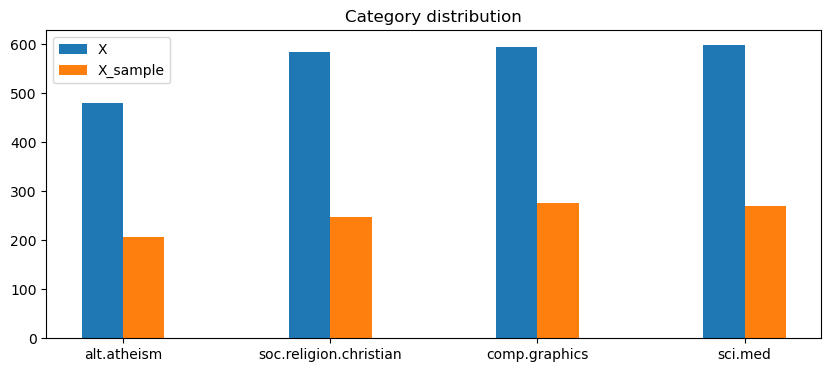

In [31]:
### Exercise8:

print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50

s = X.category_name.value_counts()
s = s.sort_index()

s2 = X_sample.category_name.value_counts()
s2 = s2.sort_index() 

plt.figure(figsize = (10,4))
X_axis = np.arange(len(categories)) 
  
plt.bar(X_axis - 0.1, s, 0.2, label = 'X') 
plt.bar(X_axis + 0.1, s2, 0.2, label = 'X_sample') 
  
plt.xticks(X_axis, categories) 
plt.title("Category distribution") 
plt.legend() 

In [32]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()
analyze(X.text[0])
analyze(" ".join(list(X[:1].text)))
count_vect.get_feature_names_out()[0:10]
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [33]:
### Exercise10:

tmp = X_counts[4, 0:100].toarray()
n = np.argsort(tmp)[0,-2]
print('The word is:', count_vect.get_feature_names_out()[n])

The word is: 01


(36,)


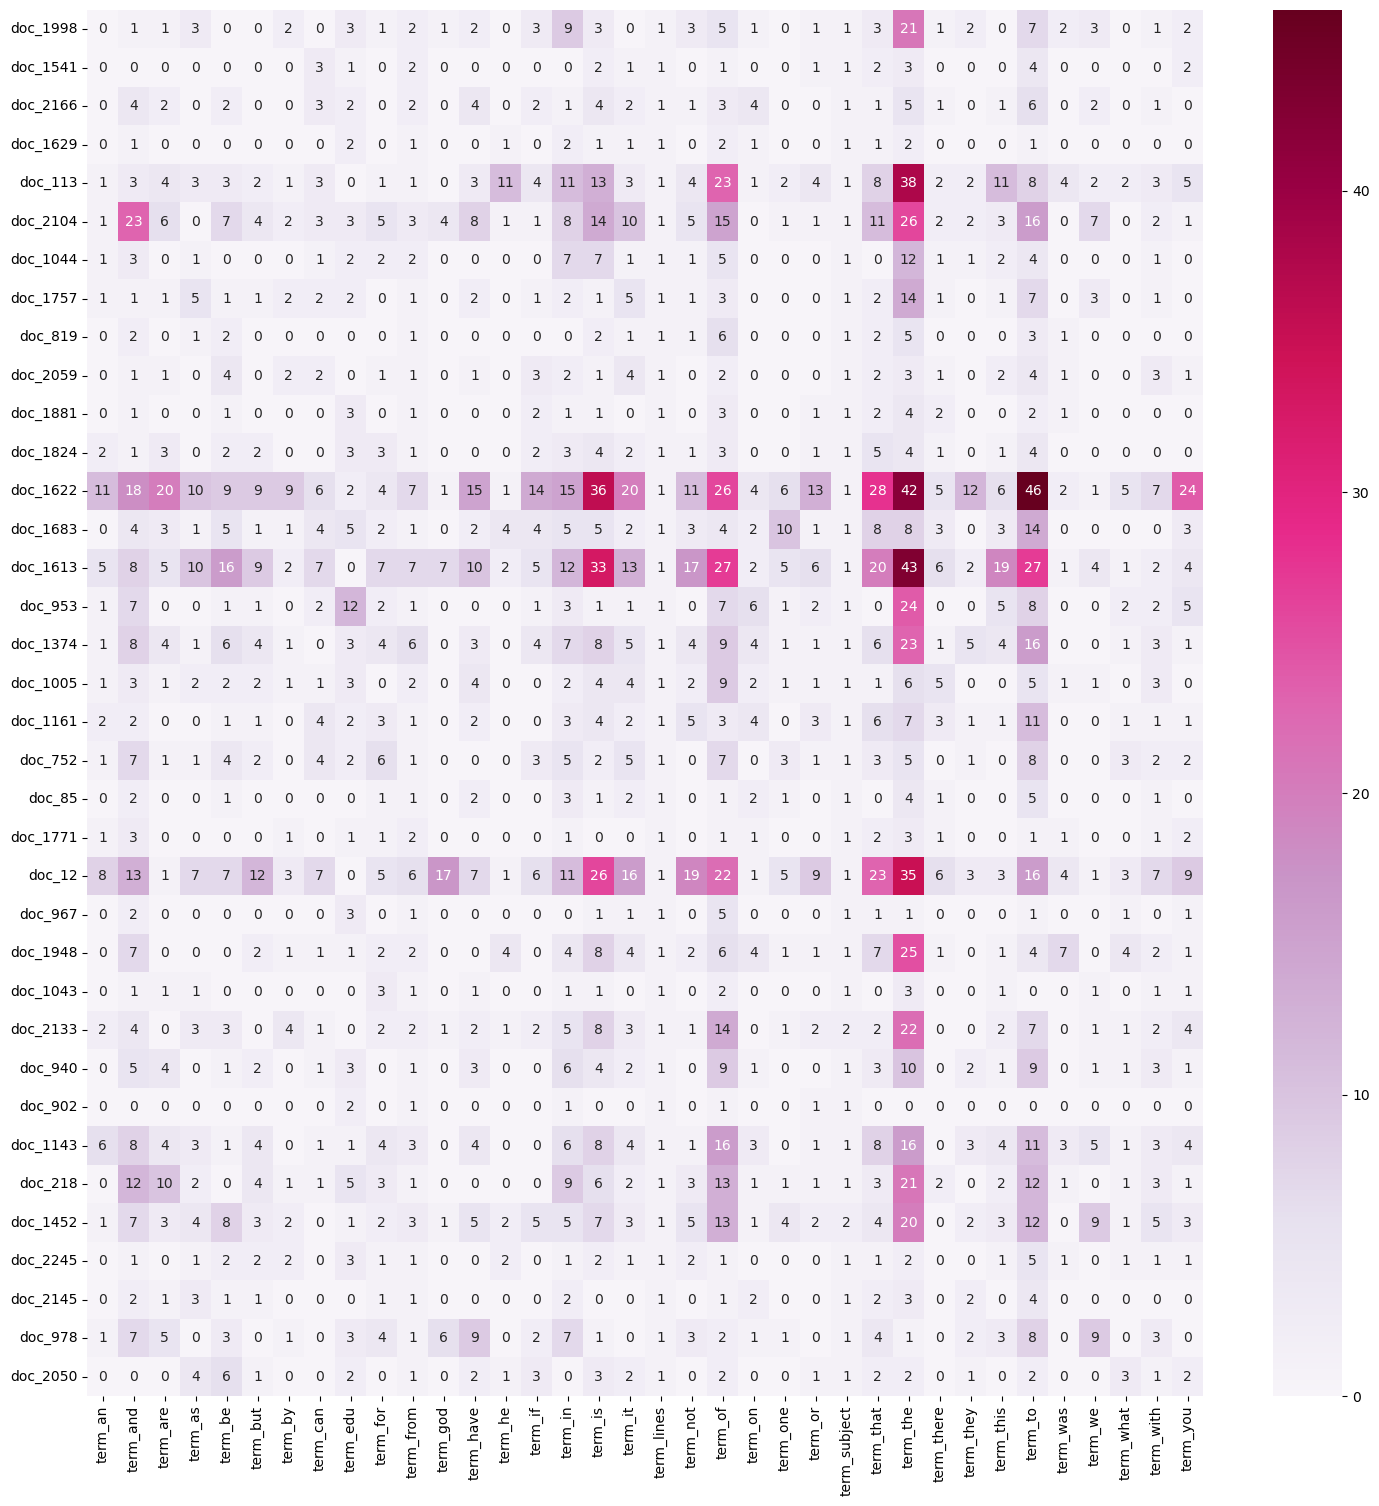

In [35]:
### Exercise11:

"""
Because most of the element is zero, so we need to know where are the non-zero elements, and plot them out.
We need to focus on the columns that the terms with the largest freqencies,
because non-zero element will appear in those columns with larger probability.

Therefore, I select the terms with Top 0.1% frequencies. (column locations)
For the documents, I do the random selection (row locations). Because it is meaningless to do sorting. 
The probability of intersection is not confirmed by marginal probabilities always. 
So we only need to select the columns with larger probability.
"""
import seaborn as sns
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
c = np.percentile(term_frequencies, 99.9)
mask = term_frequencies >= c
n = len(mask[mask == True])
docs = np.random.randint(0,len(X), size=(n))
print(docs.shape)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[mask]]
plot_y = ["doc_"+ str(i) for i in np.array(X.index)[docs]]

plot_z = X_counts[docs][:,mask].toarray() #df_counts[how many documents, how many terms]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(18, 18))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd", annot=True)

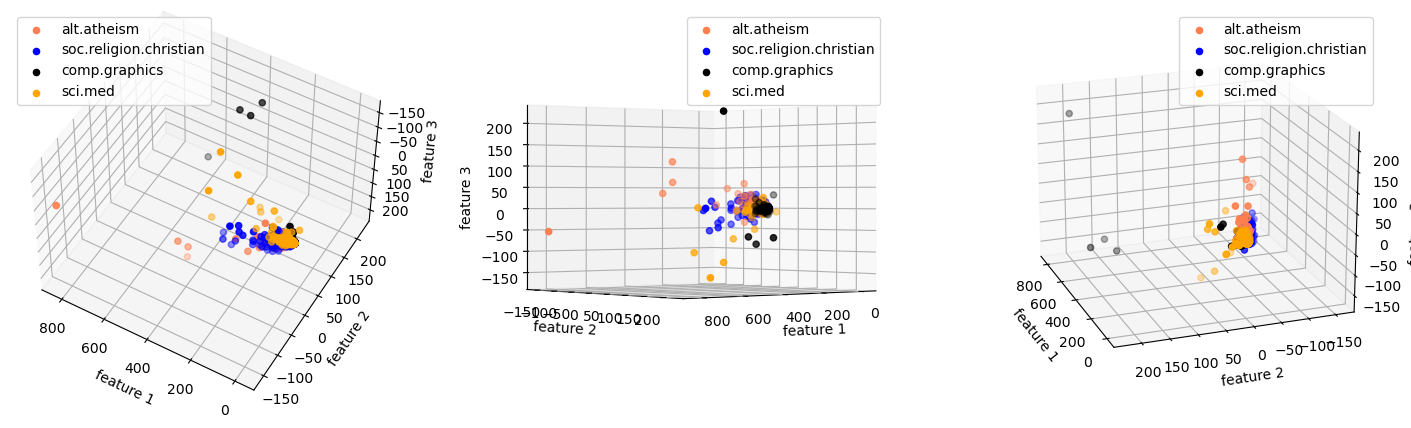

In [36]:
### Exercise12:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']
fig = plt.figure(figsize =  (18,5))
for i in range(3):
    ax = fig.add_subplot(1,3,i+1,projection='3d')
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o', label = category)
        ax.set_xlabel('feature 1')
        ax.set_ylabel('feature 2')
        ax.set_zlabel('feature 3')
    if i == 0:
        ax.view_init(-130,60) 
    elif i == 1:
        ax.view_init(0,50) 
    elif i == 2:
        ax.view_init(20, 160) 
    ax.legend()

In [37]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

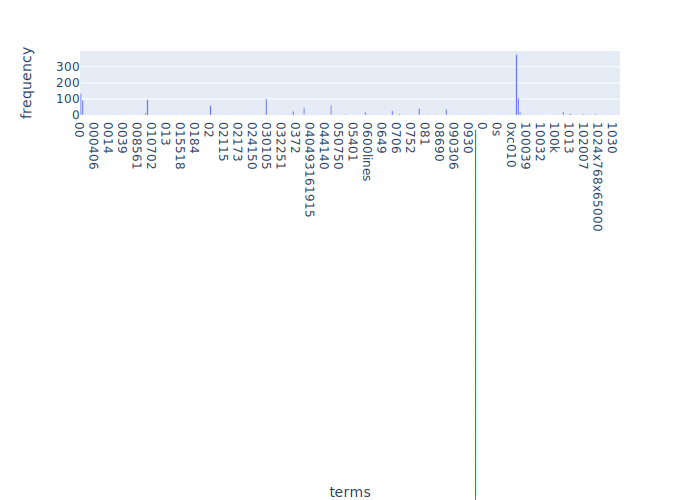

In [41]:
### Exercise13:

import plotly.express as px 


#Because the plot cannot be rendered on Github, 
#I found the solution on the following website: https://github.com/plotly/plotly.py/issues/931
        
# import plotly.io as pio

# pio.renderers.default = 'svg'
# pio.renderers['svg'].engine = 'kaleido'

df = {"terms": list(count_vect.get_feature_names_out()[:300]),
      "frequency": list(term_frequencies[:300])}
fig = px.bar(df, x = 'terms', y = 'frequency')  
fig.show("svg")

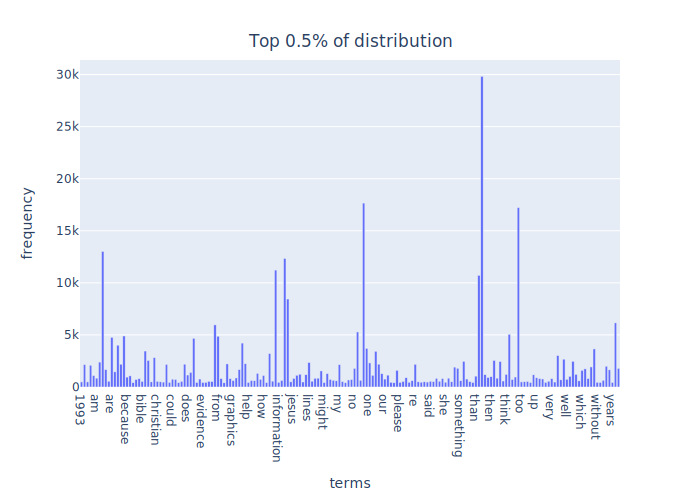

The distribution that term frequency larger than 99.5% data (which is top 0.5%), total number is 178


In [40]:
### Exercise14:


q_995 = np.percentile(term_frequencies,99.5)
mask = term_frequencies > q_995
x = count_vect.get_feature_names_out()[mask]
y = term_frequencies[mask]

df = {"terms": x,
      "frequency": y}
fig = px.bar(df, x = 'terms', y = 'frequency')
fig.update_layout(
    title={
        'text': "Top 0.5% of distribution",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show("svg")

print("The distribution that term frequency larger than 99.5% data (which is top 0.5%), total number is", len(x))


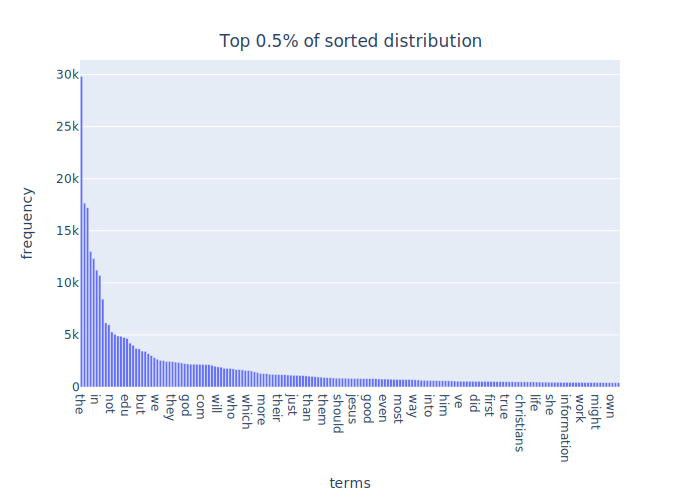

In [42]:
### Exercise15:

mask = np.argsort(-y)

df = {"terms": x[mask],
      "frequency": y[mask]}
fig = px.bar(df, x = 'terms', y = 'frequency')  
fig.update_layout(
    title={
        'text': "Top 0.5% of sorted distribution",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show("svg")


In [43]:
### Exercise16:

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
display(X[0:9])

print("It works. We can know label binarizer also works for the nominal type of data from this example.")

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


It works. We can know label binarizer also works for the nominal type of data from this example.
